# Yêu cầu 1

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

## Step 1: Import Libraries and Load Dataset

In [2]:
(X_train, _), (X_test, _) = tf.keras.datasets.mnist.load_data()

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

X_train_small = X_train[:10000]
X_test_small = X_test[:1000]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


## Step 2: Prepare Rotation Task Dataset

In [3]:
angles = [0, 90, 180, 270]

def rotate_images(images, angles):
    rotated_images = []
    labels = []

    for image in images:
        for i, angle in enumerate(angles):
            rotated = tf.image.rot90(image, k=angle // 90)
            rotated_images.append(rotated)
            labels.append(i)

    return np.array(rotated_images), np.array(labels)

In [4]:
X_train_rot, y_train_rot = rotate_images(X_train_small, angles)
X_test_rot, y_test_rot = rotate_images(X_test_small, angles)

In [5]:
X_train_rot.shape

(40000, 28, 28, 1)

In [6]:
X_train_rot[0][0]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [7]:
y_train_rot[0]

np.int64(0)

## Step 3: Define and Compile CNN Model for Rotation Classification

In [8]:
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(angles), activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 224,260 (876.02 KB)

 Trainable params: 224,260 (876.02 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

## Step 4: Train the Model on Rotated Images

In [11]:
model.fit(X_train_rot, y_train_rot, epochs=5, batch_size=64, validation_data=(X_test_rot, y_test_rot))

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8729 - loss: 0.3560 - val_accuracy: 0.9778 - val_loss: 0.0776
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9732 - loss: 0.0754 - val_accuracy: 0.9760 - val_loss: 0.0698
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9824 - loss: 0.0508 - val_accuracy: 0.9847 - val_loss: 0.0417
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9874 - loss: 0.0372 - val_accuracy: 0.9858 - val_loss: 0.0389
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9884 - loss: 0.0309 - val_accuracy: 0.9822 - val_loss: 0.0447


## Step 5: Visualized Rotation Predicted Results

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


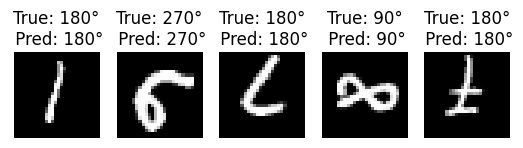

In [12]:
import matplotlib.pyplot as plt

predictions = model.predict(X_test_rot)

num_examples = 5
indices = np.random.choice(len(X_test_rot), num_examples, replace=False)

for i, idx in enumerate(indices):
    img = X_test_rot[idx].squeeze()
    true_label = y_test_rot[idx]
    pred_label = np.argmax(predictions[idx])

    plt.subplot(1, num_examples, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {angles[true_label]}°\n Pred: {angles[pred_label]}°")
    plt.axis("off")

plt.show()

## Step 6: Load Labeled MNIST Data for Fine-Tuning


In [13]:
(X_train_labeled, y_train_labeled), (X_test_labeled, y_test_labeled) =  tf.keras.datasets.mnist.load_data()

In [14]:
X_train_labeled = X_train_labeled.astype('float32') / 255.
X_test_labeled = X_test_labeled.astype('float32') / 255.

In [15]:
X_train_labeled.shape

(60000, 28, 28)

In [16]:
X_train_labeled[0][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [17]:
X_train_labeled = np.expand_dims(X_train_labeled, -1)
X_test_labeled = np.expand_dims(X_test_labeled, -1)

In [18]:
X_train_labeled.shape

(60000, 28, 28, 1)

In [19]:
X_train_fine = X_train_labeled[:1000]
y_train_fine = y_train_labeled[:1000]
X_test_fine = X_test_labeled[:200]
y_test_fine = y_test_labeled[:200]

## Step 7: Modify and Fine-Tune Model on Labeled Digital Data

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 672,782 (2.57 MB)

 Trainable params: 224,260 (876.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 448,522 (1.71 MB)

In [21]:
for layer in model.layers[:-2]:
    layer.trainable = False

model.pop()
model.add(layers.Dense(10, activation='softmax'))

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673,556 (2.57 MB)

 Trainable params: 206,218 (805.54 KB)

 Non-trainable params: 18,816 (73.50 KB)

 Optimizer params: 448,522 (1.71 MB)

In [23]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [24]:
model.fit(X_train_fine, y_train_fine, epochs=5, batch_size=64,
          validation_data=(X_test_fine, y_test_fine))

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - accuracy: 0.3417 - loss: 2.0726 - val_accuracy: 0.7500 - val_loss: 0.8069
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8553 - loss: 0.5600 - val_accuracy: 0.8700 - val_loss: 0.4230
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9331 - loss: 0.2874 - val_accuracy: 0.9050 - val_loss: 0.3259
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9427 - loss: 0.2394 - val_accuracy: 0.9500 - val_loss: 0.2380
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9542 - loss: 0.1929 - val_accuracy: 0.9550 - val_loss: 0.2040


## Step 8: Visualize Fine-Tuned Predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


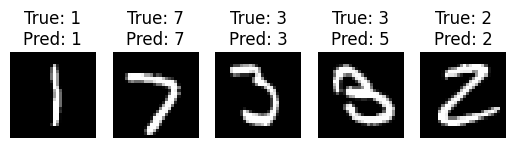

In [25]:
predictions = model.predict(X_test_fine)

indicies = np.random.choice(len(X_test_fine), 5, replace=True)

for i, idx in enumerate(indicies):
    img = X_test_fine[idx].squeeze()
    true_label = y_test_fine[idx]
    pred_label = np.argmax(predictions[idx])

    plt.subplot(1, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')

plt.show()

# Yêu cầu 2:

## Step 1: Import Libraries and Load Dataset

In [30]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [27]:
data_zip_path = '/content/drive/MyDrive/Colab_Notebooks/HoaVietNam.zip'

In [28]:
!unzip -q '{data_zip_path}' -d '/content/'

In [29]:
DATA_DIR = "/content/HoaVietNam"
TRAIN_DIR = os.path.join(DATA_DIR, "train")
TEST_DIR = os.path.join(DATA_DIR, "test")
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [33]:
train_df = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_df = tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

Found 150 files belonging to 5 classes.
Found 50 files belonging to 5 classes.


In [38]:
len(train_df)

5

In [34]:
classes_names = train_df.class_names
classes_names

['Cuc', 'Dao', 'Lan', 'Mai', 'Tho']

In [35]:
# Normalize pixel -> [0, 1]
normalized_layer = layers.Rescaling(1./255)

In [42]:
train_ds = train_df.map(lambda x, y: (normalized_layer(x), y))
test_ds = test_df.map(lambda x, y: (normalized_layer(x), y))

In [43]:
train_small = train_ds.take(20)
test_small = test_ds.take(5)

## Step 2: Prepare Rotation Task Dataset

In [44]:
angles = [0, 90, 180, 270]

def rotate_images(images, labels, angles):
    rotated_images = []
    rotated_labels = []
    for img, lab in zip(images, labels):
        for i, angle in enumerate(angles):
            rotated = tf.image.rot90(img, k=angle // 90)
            rotated_images.append(rotated.numpy())
            rotated_labels.append(i)
    return np.array(rotated_images), np.array(rotated_labels)

# Convert to numpy
x_train_np, y_train_np = next(iter(train_small.unbatch().batch(1000)))
x_test_np, y_test_np = next(iter(test_small.unbatch().batch(200)))



In [45]:
# Create rotated dataset
x_train_rot, y_train_rot = rotate_images(x_train_np, y_train_np, angles)
x_test_rot, y_test_rot = rotate_images(x_test_np, y_test_np, angles)

print("Train rotated:", x_train_rot.shape, y_train_rot.shape)
print("Test rotated:", x_test_rot.shape, y_test_rot.shape)

Train rotated: (600, 224, 224, 3) (600,)
Test rotated: (200, 224, 224, 3) (200,)


# Step 3: Define and Compile CNN Model for Rotation Classification

In [46]:
num_classes = len(angles)  # 4 class: 0, 90, 180, 270

In [50]:
model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(224, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(224, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 52, 52, 224)    │       129,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 26, 26, 224)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 151424)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 224)            │    33,919,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │           900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,068,740 (129.96 MB)

 Trainable params: 34,068,740 (129.96 MB)

 Non-trainable params: 0 (0.00 B)

## Step 4: Train the Model on Rotated Images

In [51]:
history = model.fit(
    x_train_rot, y_train_rot,
    epochs=5,
    batch_size=32,
    validation_data=(x_test_rot, y_test_rot)
)


Epoch 1/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 17s 514ms/step - accuracy: 0.2662 - loss: 2.3553 - val_accuracy: 0.2400 - val_loss: 1.3863
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.3069 - loss: 1.3900 - val_accuracy: 0.2650 - val_loss: 1.3807
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.3543 - loss: 1.3543 - val_accuracy: 0.3700 - val_loss: 1.3275
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.4560 - loss: 1.2034 - val_accuracy: 0.3450 - val_loss: 1.3421
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.6123 - loss: 0.9382 - val_accuracy: 0.4600 - val_loss: 1.2607


## Step 5: Visualized Rotation Predicted Results

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


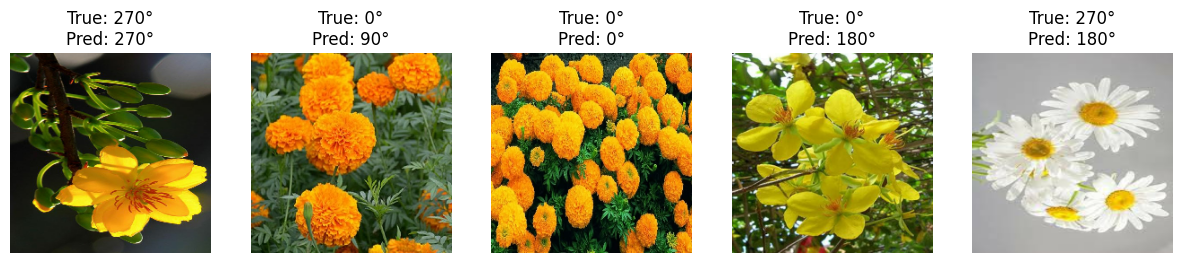

In [52]:
import matplotlib.pyplot as plt


predictions = model.predict(x_test_rot)

num_examples = 5
indices = np.random.choice(len(x_test_rot), num_examples, replace=False)

plt.figure(figsize=(15, 3))
for i, idx in enumerate(indices):
    img = x_test_rot[idx]  # rgb(224, 224, 3)
    true_label = y_test_rot[idx]
    pred_label = np.argmax(predictions[idx])

    plt.subplot(1, num_examples, i + 1)
    plt.imshow(img.astype("float32"))
    plt.title(f"True: {angles[true_label]}°\nPred: {angles[pred_label]}°")
    plt.axis('off')

plt.show()


## Step 6: Load Labeled Data for Fine-Tuning

In [53]:
import tensorflow as tf
import numpy as np

DATA_DIR = "/content/HoaVietNam"
TRAIN_DIR = os.path.join(DATA_DIR, "train")
TEST_DIR = os.path.join(DATA_DIR, "test")
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Load dataset từ thư mục
train_ds_full = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_ds_full = tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)


Found 150 files belonging to 5 classes.
Found 50 files belonging to 5 classes.


In [54]:
class_names = train_ds_full.class_names
print("Các lớp hoa:", class_names)

Các lớp hoa: ['Cuc', 'Dao', 'Lan', 'Mai', 'Tho']


In [55]:
# Chuẩn hóa pixel
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds_full = train_ds_full.map(lambda x, y: (normalization_layer(x), y))
test_ds_full = test_ds_full.map(lambda x, y: (normalization_layer(x), y))

In [56]:
# Convert sang numpy
x_train_labeled, y_train_labeled = next(iter(train_ds_full.unbatch().batch(2000)))
x_test_labeled, y_test_labeled = next(iter(test_ds_full.unbatch().batch(500)))

In [57]:
x_train_fine = x_train_labeled[:1000]
y_train_fine = y_train_labeled[:1000]
x_test_fine = x_test_labeled[:200]
y_test_fine = y_test_labeled[:200]

print("Train fine:", x_train_fine.shape, y_train_fine.shape)
print("Test fine:", x_test_fine.shape, y_test_fine.shape)


Train fine: (150, 224, 224, 3) (150,)
Test fine: (50, 224, 224, 3) (50,)


## Step 7: Modify and Fine-Tune Model on Labeled Digital Data

In [58]:
for layer in model.layers[:-2]:
    layer.trainable = False

In [60]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 52, 52, 224)    │       129,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 26, 26, 224)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 151424)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 224)            │    33,919,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │           900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,206,222 (389.89 MB)

 Trainable params: 33,920,100 (129.39 MB)

 Non-trainable params: 148,640 (580.62 KB)

 Optimizer params: 68,137,482 (259.92 MB)

In [61]:
num_classes = len(class_names)
base = models.Sequential(model.layers[:-1])
base.add(layers.Dense(num_classes, activation='softmax'))
base.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 52, 52, 224)    │       129,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 26, 26, 224)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 151424)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 224)            │    33,919,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,067,840 (129.96 MB)

 Trainable params: 33,919,200 (129.39 MB)

 Non-trainable params: 148,640 (580.62 KB)

In [62]:
base.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


### Fine-tune với tập nhỏ

In [63]:
history_fine = base.fit(
    x_train_fine, y_train_fine,
    epochs=5,
    batch_size=BATCH_SIZE,
    validation_data=(x_test_fine, y_test_fine)
)


Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.2653 - loss: 1.6386 - val_accuracy: 0.3000 - val_loss: 1.4465
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.7214 - loss: 1.1572 - val_accuracy: 0.5800 - val_loss: 1.2510
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8353 - loss: 0.7989 - val_accuracy: 0.5200 - val_loss: 1.1610
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8832 - loss: 0.6459 - val_accuracy: 0.6200 - val_loss: 1.1066
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.9510 - loss: 0.4854 - val_accuracy: 0.6200 - val_loss: 1.0211


## Predict on small test

In [64]:
predictions = base.predict(x_test_fine)
predictions[:5]





1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 581ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 421ms/step


array([[1.44787163e-01, 2.35410780e-01, 3.54863852e-01, 1.89017534e-01,
        7.59206265e-02],
       [9.92417812e-01, 2.24766904e-04, 2.97391042e-03, 2.98330444e-03,
        1.40008808e-03],
       [6.01622939e-01, 6.85751811e-02, 2.92730667e-02, 3.16305570e-02,
        2.68898278e-01],
       [4.98516798e-01, 1.04298718e-01, 1.00065716e-01, 1.23241849e-01,
        1.73876941e-01],
       [5.37554562e-01, 3.18239257e-02, 4.03773673e-02, 4.21798229e-02,
        3.48064274e-01]], dtype=float32)

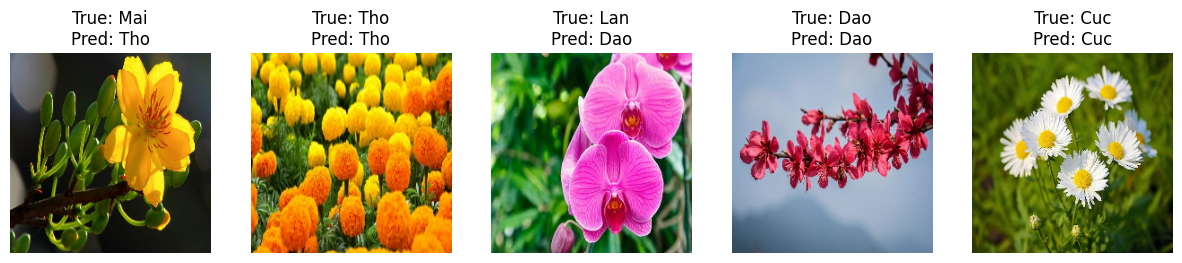

In [65]:
indices = np.random.choice(len(x_test_fine), 5, replace=False)
plt.figure(figsize=(15, 3))
for i, idx in enumerate(indices):
    img = x_test_fine[idx]
    true_label = y_test_fine[idx].numpy()
    pred_label = np.argmax(predictions[idx])

    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(f"True: {class_names[true_label]}\nPred: {class_names[pred_label]}")
    plt.axis('off')

plt.show()